# import required libraries


In [147]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve



### load the dataset

In [118]:
df=pd.read_csv("loan_data.csv")

### print the first 5 rows

In [119]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### last 5 rows

In [120]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


### check the total number of data

In [121]:
df.shape

(45000, 14)

### check the information about the dataset

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### to check unique values in categorical column

In [123]:
categorical_column=["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]

In [124]:
for cat_col in df.columns:
    if cat_col in categorical_column:
      print(cat_col,df[cat_col].unique())
      print("_" * 80)

person_gender ['female' 'male']
________________________________________________________________________________
person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
________________________________________________________________________________
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
________________________________________________________________________________
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
________________________________________________________________________________
previous_loan_defaults_on_file ['No' 'Yes']
________________________________________________________________________________


### to check null values

In [125]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# EDA

In [126]:
df.shape

(45000, 14)

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


### from the above so many columns have outliers so check the outliers with the help of boxplot

In [128]:
numerical_columns=df.select_dtypes(include=['number']).columns


In [129]:
numerical_columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

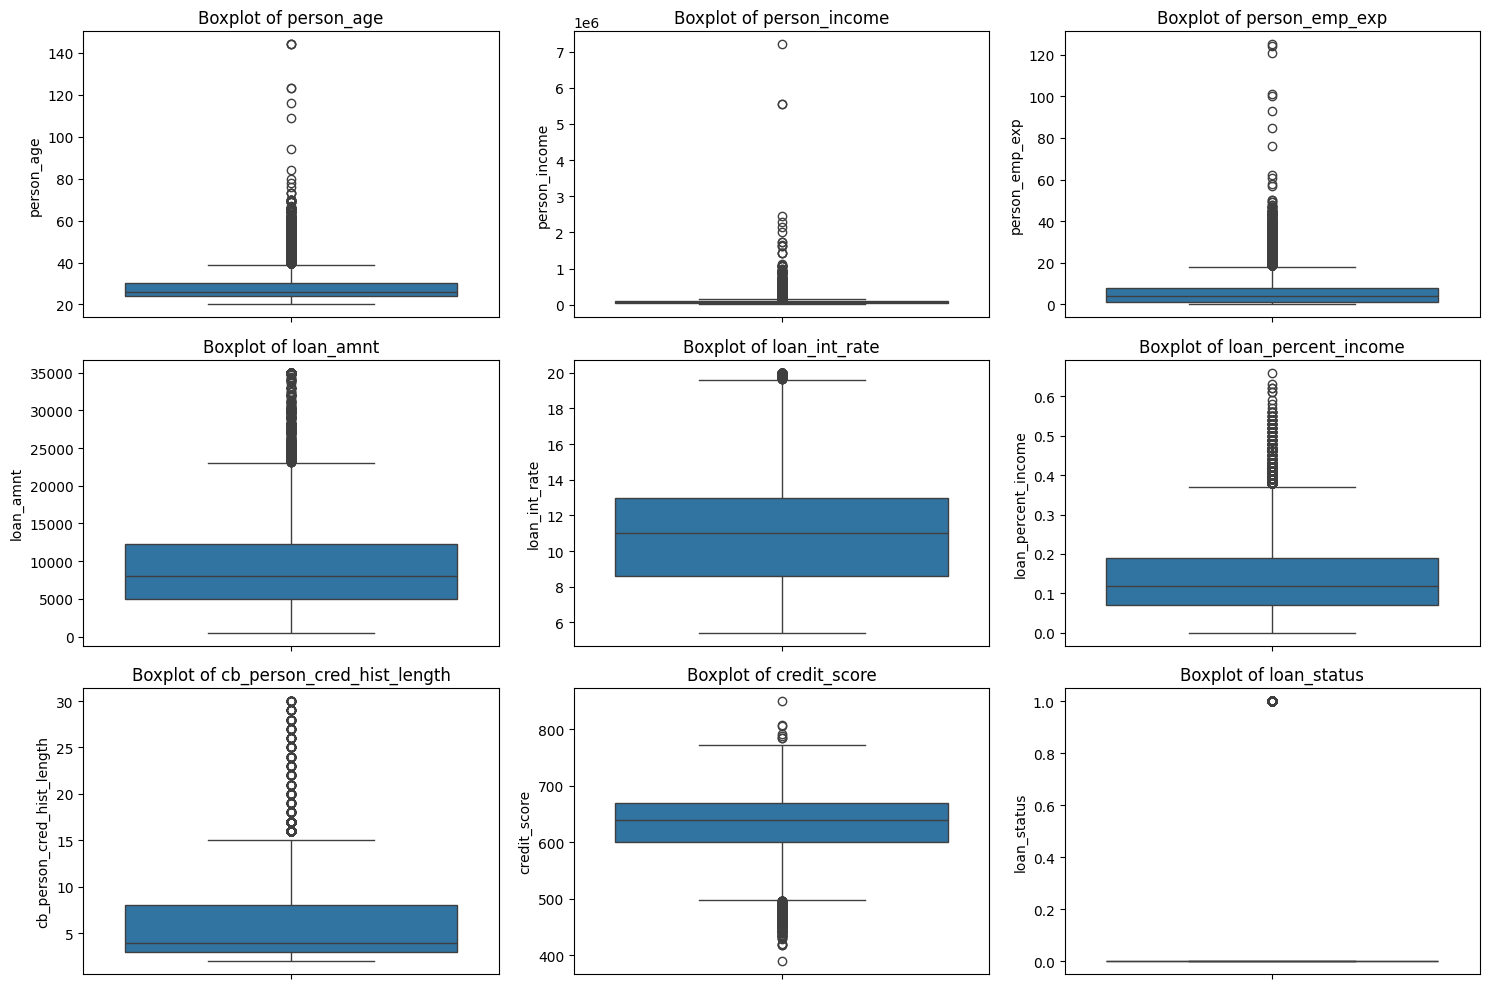

In [130]:
plt.figure(figsize=(15,10))

for i,col in enumerate(numerical_columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    
plt.tight_layout()  
plt.show()

### detect the outliers using iqr

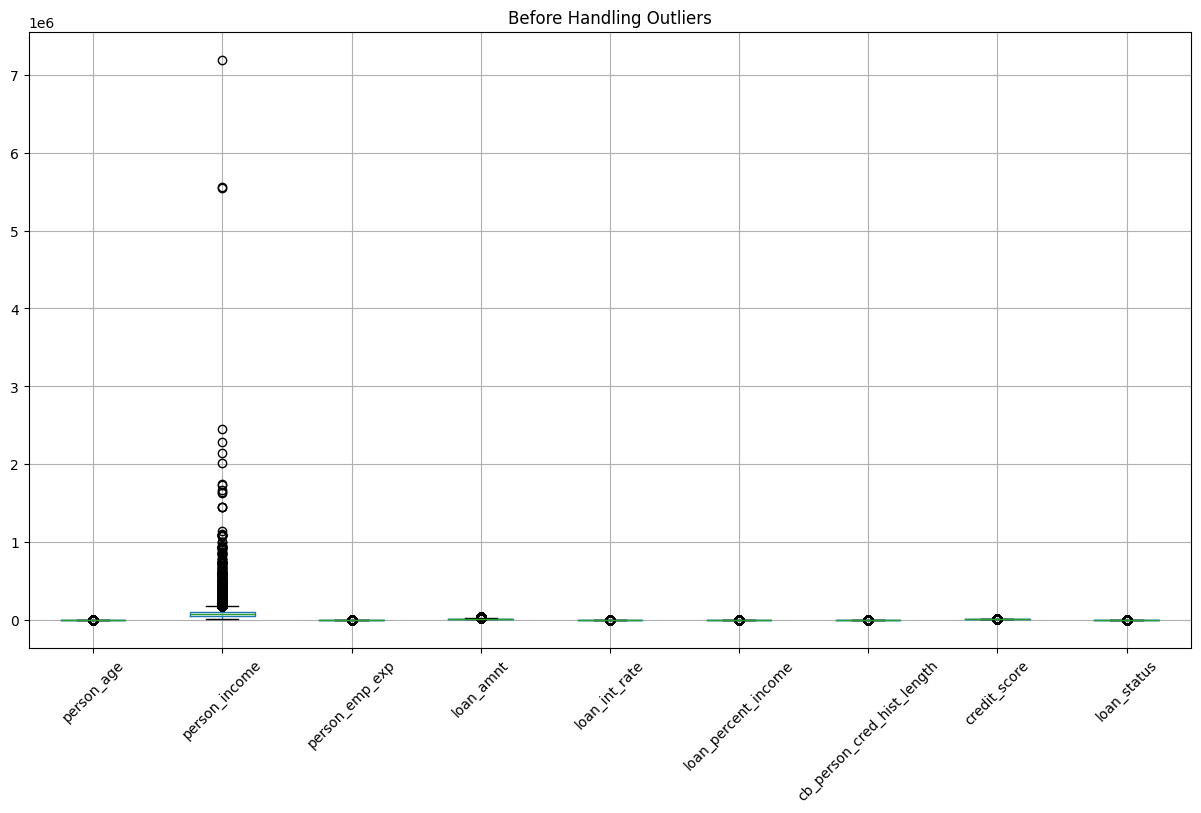

In [131]:
# Boxplot before handling outliers
plt.figure(figsize=(15, 8))
df[numerical_columns].boxplot(rot=45)
plt.title("Before Handling Outliers")
plt.show()

In [132]:


# Exclude 'loan_status' from outlier removal
numerical_columns = [col for col in numerical_columns if col != "loan_status"]

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])


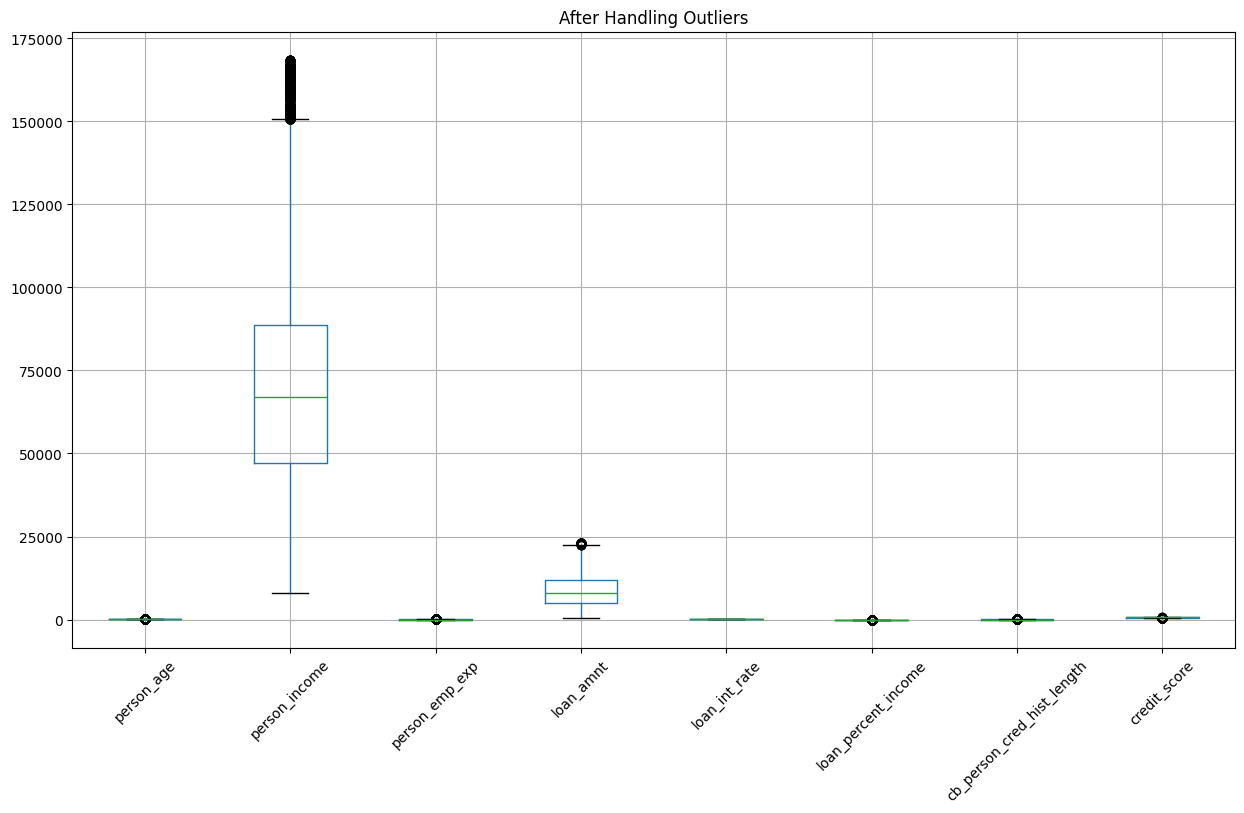

In [133]:

# Boxplot after handling outliers
plt.figure(figsize=(15, 8))
df[numerical_columns].boxplot(rot=45)
plt.title("After Handling Outliers")
plt.show()

In [134]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,8000.0,PERSONAL,16.02,0.12,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.12,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,8000.0,MEDICAL,15.23,0.12,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,8000.0,MEDICAL,14.27,0.12,4.0,586.0,No,1


### label encoding for categorical columns

In [135]:
label_encoder=LabelEncoder()

for col in categorical_column:
    df[col]=label_encoder.fit_transform(df[col])
    


In [136]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0.0,3,8000.0,4,16.02,0.12,3.0,561.0,0,1
1,21.0,0,3,12282.0,0.0,2,1000.0,1,11.14,0.08,2.0,504.0,1,0
2,25.0,0,3,12438.0,3.0,0,5500.0,3,12.87,0.12,3.0,635.0,0,1
3,23.0,0,1,79753.0,0.0,3,8000.0,3,15.23,0.12,2.0,675.0,0,1
4,24.0,1,4,66135.0,1.0,3,8000.0,3,14.27,0.12,4.0,586.0,0,1


In [137]:
print(df["loan_status"].value_counts())


loan_status
0    35000
1    10000
Name: count, dtype: int64


### the target variable is imbalanced 

In [138]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [139]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0.0,3,8000.0,4,16.02,0.12,3.0,561.0,0
1,21.0,0,3,12282.0,0.0,2,1000.0,1,11.14,0.08,2.0,504.0,1
2,25.0,0,3,12438.0,3.0,0,5500.0,3,12.87,0.12,3.0,635.0,0
3,23.0,0,1,79753.0,0.0,3,8000.0,3,15.23,0.12,2.0,675.0,0
4,24.0,1,4,66135.0,1.0,3,8000.0,3,14.27,0.12,4.0,586.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6.0,3,15000.0,3,15.66,0.31,3.0,645.0,0
44996,37.0,0,0,65800.0,17.0,3,9000.0,2,14.07,0.14,11.0,621.0,0
44997,33.0,1,0,56942.0,7.0,3,2771.0,0,10.02,0.05,10.0,668.0,0
44998,29.0,1,1,33164.0,4.0,3,12000.0,1,13.23,0.36,6.0,604.0,0


In [140]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [156]:
smote = SMOTE(random_state=42)

In [157]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [158]:
print(y_train_smote.shape)

(56020,)


In [159]:
print(y_train_smote.value_counts())

loan_status
0    28010
1    28010
Name: count, dtype: int64


In [160]:
# dictionary of models
models={
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "lgbm" : LGBMClassifier(random_state=42)
}

In [161]:
# dictionary to store the cross validation results
from sklearn.model_selection import cross_val_score


cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("_"*70)

Training DecisionTreeClassifier with default parameters
DecisionTreeClassifier cross-validation accuracy: 0.91
______________________________________________________________________
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.95
______________________________________________________________________
Training lgbm with default parameters
[LightGBM] [Info] Number of positive: 22408, number of negative: 22408
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2841
[LightGBM] [Info] Number of data points in the train set: 44816, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 22408, number of negative: 22408
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2835
[LightGBM] [Info] Number of data points in the train set: 44816, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 22408, number of negative: 22408
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 44816, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 22408, number of negative: 22408
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 44816, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 22408, number of negative: 22408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2829
[LightGBM] [Info] Number of data points in the train set: 44816, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
lgbm cross-validation accuracy: 0.94
______________________________________________________________________


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [150]:
cv_scores

{'DecisionTreeClassifier': array([0.84728668, 0.89271689, 0.91288825, 0.92225991, 0.91146019]),
 'Random Forest': array([0.87861478, 0.93082828, 0.94867904, 0.95269547, 0.95135666]),
 'lgbm': array([0.84335951, 0.93752231, 0.96554802, 0.96715459, 0.96911817])}

In [151]:
rfc=RandomForestClassifier(random_state=42)

In [152]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [153]:
y_test.value_counts()

loan_status
0    6990
1    2010
Name: count, dtype: int64

In [154]:
#evaluate on test data
y_test_pred=rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n", classification_report(y_test,y_test_pred))

Accuracy Score:
 0.9022222222222223
Confusion Matrix:
 [[6436  554]
 [ 326 1684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      6990
           1       0.75      0.84      0.79      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.88      0.86      9000
weighted avg       0.91      0.90      0.90      9000

